# Week 36

## Exercise 1
### Ex1a)
Last week we showed that 
\begin{gather}
    \frac{\partial (\mathbf{x} - \mathbf{A}\mathbf{s})^T(\mathbf{x} - \mathbf{A}\mathbf{s})}{\partial \mathbf{s}} = -2(\mathbf{x} - \mathbf{A}\mathbf{s})^T\mathbf{A}
\end{gather}
which then showed that the differentiating the OLS cost function gives
\begin{gather}
    \frac{\partial C_{OLS}(\mathbf{\beta})}{\partial \mathbf{\beta}} = \frac{\partial (\mathbf{y} - \mathbf{X}\mathbf{\beta})^T(\mathbf{y} - \mathbf{X}\mathbf{\beta})}{\partial \mathbf{\beta}} = -2(\mathbf{y} - \mathbf{X}\mathbf{\beta})^T\mathbf{X}
\end{gather}
which gave us the optimal $\mathbf{\hat{\beta}}_{OLS}$ when setting $\frac{\partial C_{OLS}}{\partial \mathbf{\beta}}=0$
\begin{gather}
    \mathbf{\hat{\beta}}_{OLS} = (\mathbf{X}^T\mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
\end{gather}

For the ridge cost function all we are changing are adding a term $\lambda |\mathbf{\beta}|^2$, so we can use this result when differentiating the new cost function $C_{ridge}=C_{OLS} + \lambda |\mathbf{\beta}|^2$:
\begin{gather}
    \frac{\partial C_{ridge}(\mathbf{\beta})}{\partial \mathbf{\beta}} = \frac{\partial C_{OLS}(\mathbf{\beta})}{\partial \mathbf{\beta}} + \frac{\partial}{\partial \mathbf{\beta}} (\lambda |\mathbf{\beta}|^2)
    \\ = -2(\mathbf{y} - \mathbf{X}\mathbf{\beta})^T\mathbf{X} + \frac{\partial}{\partial \mathbf{\beta}} (\lambda \sum_{i=0}^{P-1} \beta_i^2)
    \\ = 2\mathbf{\beta}^T\mathbf{X}^T\mathbf{X} - 2\mathbf{y}^T\mathbf{X} + \lambda \begin{pmatrix} \frac{\partial \sum_{i=0}^{P-1} \beta_i^2}{\partial \beta_0} & ... & \frac{\partial \sum_{i=0}^{P-1} \beta_i^2}{\partial \beta_{P-1}}\end{pmatrix}
    \\ = 2\mathbf{\beta}^T\mathbf{X}^T\mathbf{X} - 2\mathbf{y}^T\mathbf{X} + \lambda \begin{pmatrix} 2b_0 & ... & 2b_{P-1}\end{pmatrix} 
    \\ = 2\mathbf{\beta}^T\mathbf{X}^T\mathbf{X} - 2\mathbf{y}^T\mathbf{X} + 2\lambda \mathbf{\beta}^T
\end{gather}
We now set the differential equal to zero to minimise, and solve for the optimal $\mathbf{\hat{\beta}}$:
\begin{gather}
    2\mathbf{\hat{\beta}}_{ridge}^T\mathbf{X}^T\mathbf{X} - 2\mathbf{y}^T\mathbf{X} + 2\lambda \mathbf{\hat{\beta}}_{ridge}^T = 0
    \\ \mathbf{\hat{\beta}}_{ridge}^T \mathbf{X}^T\mathbf{X} + \lambda \mathbf{\hat{\beta}}_{ridge}^T = \mathbf{y}^T\mathbf{X}
    \\ \mathbf{\hat{\beta}}_{ridge}^T \left( \mathbf{X}^T\mathbf{X} + \lambda \mathbf{I} \right) = \mathbf{y}^T\mathbf{X}
    \\ \mathbf{\hat{\beta}}_{ridge} \left( \mathbf{X}^T\mathbf{X} + \lambda \mathbf{I} \right)^T = \mathbf{X}^T\mathbf{y}
    \\ \mathbf{\hat{\beta}}_{ridge} \left( \mathbf{X}^T\mathbf{X} + \lambda \mathbf{I} \right) = \mathbf{X}^T\mathbf{y}
    \\ \mathbf{\hat{\beta}}_{ridge} = \left( \mathbf{X}^T\mathbf{X} + \lambda \mathbf{I} \right)^{-1} \mathbf{X}^T\mathbf{y}
\end{gather}
which is the result we wanted to show. We can see that this is exactly what we got from OLS but shrunk by a factor $\sigma_j^2/(\sigma_j^2+\lambda)$. Since $\lambda>0$, this whole factor approaches 1 when $\lambda \rightarrow 0$ and falls to zero when $\lambda \rightarrow \infty$. So we can shrink our $\mathbf{\tilde{y}}_{ridge}$ by lowering $\lambda$. 

### Ex1b)
We put the SVD in the equation:
\begin{gather}
    \mathbf{\hat{y}}_{OLS} = \mathbf{X}\mathbf{\beta}_{OLS} = \mathbf{X} (\mathbf{X}^T\mathbf{X})^{-1} \mathbf{X}^T\mathbf{y}
    \\ = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T ((\mathbf{U} \mathbf{\Sigma} \mathbf{V}^T)^T \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T)^{-1} (\mathbf{U} \mathbf{\Sigma} \mathbf{V}^T)^T \mathbf{y}
    \\ = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T (\mathbf{V} \mathbf{\Sigma}^T \mathbf{U}^T \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T)^{-1} \mathbf{V} \mathbf{\Sigma}^T \mathbf{U}^T \mathbf{y}
\end{gather}
here we use that $\mathbf{V}^T=\mathbf{V}^{-1}$ and $\mathbf{\Sigma}^T\mathbf{\Sigma}=\begin{pmatrix} \mathbf{\tilde{\Sigma}} \\ 0 \end{pmatrix} \begin{pmatrix}\mathbf{\tilde{\Sigma}} & 0 \end{pmatrix} =  \mathbf{\tilde{\Sigma}}^2$, and that
\begin{gather}
    \mathbf{\tilde{\Sigma}} = \begin{pmatrix} \sigma_0^2 & 0 & ... & 0 \\ 0 & \sigma_1^2 & & 0 \\ 0 & 0 & ... & \sigma_{p-1}^2\end{pmatrix} 
\end{gather}
so we get:
\begin{gather}
= \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T (\mathbf{V} \mathbf{\tilde{\Sigma}}^2 \mathbf{V}^T)^{-1} \mathbf{V} \mathbf{\Sigma}^T \mathbf{U}^T \mathbf{y}
\\ = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T \mathbf{V} \mathbf{\tilde{\Sigma}}^{-2} \mathbf{V}^T \mathbf{V} \mathbf{\Sigma}^T \mathbf{U}^T \mathbf{y}
\\ = \mathbf{U} \mathbf{\Sigma} \mathbf{\tilde{\Sigma}}^{-2} \mathbf{\Sigma}^T \mathbf{U}^T \mathbf{y}
\end{gather}
and here we use $\mathbf{\Sigma} \mathbf{\tilde{\Sigma}}^{-2} \mathbf{\Sigma}^T=\mathbf{I}$:
\begin{gather}
= \mathbf{U} \mathbf{U}^T \mathbf{y} = \sum_{j=0}^{p-1}\mathbf{u}_j \mathbf{u}_j^T \mathbf{y}
\end{gather}
which is what we wanted to show for the OLS.

Now we do the same for the Ridge expression:
\begin{gather}
    \mathbf{\hat{y}}_{Ridge} = \mathbf{X}\mathbf{\beta}_{Ridge}
    \\ = \mathbf{X} \left( \mathbf{X}^T\mathbf{X} + \lambda \mathbf{I} \right)^{-1} \mathbf{X}^T\mathbf{y}
    \\ = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T \left(\mathbf{V}\mathbf{\tilde{\Sigma}}^2\mathbf{V}^T + \lambda \mathbf{I} \right)^{-1} (\mathbf{U} \mathbf{\Sigma} \mathbf{V}^T)^T \mathbf{y}
    \\ = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T \left(\mathbf{V}\mathbf{\tilde{\Sigma}}^2\mathbf{V}^T + \mathbf{V}\mathbf{V}^T\lambda \mathbf{I} \right)^{-1} \mathbf{V} \mathbf{\Sigma}^T \mathbf{U}^T \mathbf{y}
    \\ = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T \left(\mathbf{V} (\mathbf{\tilde{\Sigma}}^2 + \lambda \mathbf{I}) \mathbf{V}^T \right)^{-1} \mathbf{V} \mathbf{\Sigma}^T \mathbf{U}^T \mathbf{y}
    \\ = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T (\mathbf{V}^T)^{-1} (\mathbf{\tilde{\Sigma}}^2 + \lambda \mathbf{I})^{-1} (\mathbf{V})^{-1} \mathbf{V} \mathbf{\Sigma}^T \mathbf{U}^T \mathbf{y}
    \\ = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T \mathbf{V}(\mathbf{\tilde{\Sigma}}^2 + \lambda \mathbf{I})^{-1} \mathbf{V}^T (\mathbf{U} \mathbf{\Sigma} \mathbf{V}^T)^T \mathbf{y}
    \\ = \mathbf{U} \mathbf{\Sigma} (\mathbf{\tilde{\Sigma}}^2 + \lambda \mathbf{I})^{-1} \mathbf{\Sigma}^T \mathbf{U}^T \mathbf{y}
    \\ = \mathbf{U}\mathbf{U}^T \frac{ \mathbf{\Sigma} \mathbf{\Sigma}^T}{\mathbf{\tilde{\Sigma}}^2 + \lambda \mathbf{I}} \mathbf{y}
    \\ \mathbf{U}\mathbf{U}^T \frac{\mathbf{\tilde{\Sigma}}^2}{\mathbf{\tilde{\Sigma}}^2 + \lambda \mathbf{I}} \mathbf{y}
    \\ = \sum_{j=0}^{p-1}\mathbf{u}_j \mathbf{u}_j^T \frac{\sigma_j^2}{\sigma_j^2 + \lambda} \mathbf{y}
\end{gather}
which is our result that we wanted to show.

## Exercise 2

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

def RegressionComparision(x, y, maxdegree, lmbda_vals):
    # Create design matrix
    X = np.zeros((n, maxdegree))
    for degree in range(maxdegree):
        X[:, degree] = x[:, 0]**degree
        
    # Identity matrix
    I = np.identity(maxdegree)
    
    # Create design matrix
    X = np.zeros((n, maxdegree))
    for degree in range(maxdegree):
        X[:, degree] = x[:, 0]**(degree+1)  # Exclude the intercept
    
    # Split into training and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        
    # Scale
    scaler = StandardScaler()
    scaler = scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    train_mse_ols = np.zeros(len(lmbda_vals))
    test_mse_ols = np.zeros_like(train_mse_ols)
    train_mse_rid = np.zeros_like(train_mse_ols)
    test_mse_rid = np.zeros_like(train_mse_ols)
    for i, lmbda in enumerate(lmbda_vals):
        # Linear regression/OLS
        beta_ols = np.linalg.inv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ y_train
        y_tilde_ols = X_train_scaled @ beta_ols
        y_predict_ols = X_test_scaled @ beta_ols 
        
        # Ridge regression
        beta_rid = (np.linalg.inv(X_train_scaled.T @ X_train_scaled + lmbda * I)
                @ X_train_scaled.T @ y_train)
        y_tilde_rid = X_train_scaled @ beta_rid 
        y_predict_rid = X_test_scaled @ beta_rid 
        
        # Calculate MSE's
        train_mse_ols[i] = mean_squared_error(y_train, y_tilde_ols)
        test_mse_ols[i] = mean_squared_error(y_test, y_predict_ols)
        train_mse_rid[i] = mean_squared_error(y_train, y_tilde_rid)
        test_mse_rid[i] = mean_squared_error(y_test, y_predict_rid)
        
    # Plot OLS MSE's
    plt.plot(lmbda_vals, train_mse_ols, "k-", label="OLS Train")
    plt.plot(lmbda_vals, test_mse_ols, "k--", label="OLS Test")
    
    # Plot ridge MSE's
    plt.plot(lmbda_vals, train_mse_rid, "r-", label="Ridge Train")
    plt.plot(lmbda_vals, test_mse_rid, "r--", label="Ridge Test")
    plt.xscale("log")
    plt.legend()
    
    plt.xlabel("$\lambda$")
    plt.ylabel("MSE")
    plt.title(f"Polynomial degree = {maxdegree}")

In [33]:
# Parameters
n = 10000
lmbda_vals = np.asarray([0.0001, 0.001, 0.01, 0.1, 1])

# Create random data set
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1, x.shape)

### Polynomial of degree 5:

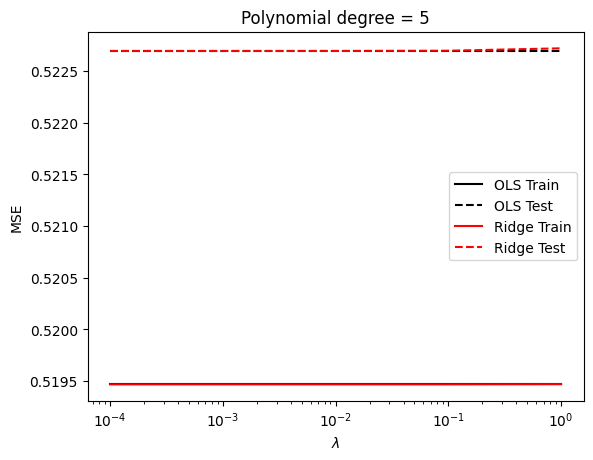

In [34]:
RegressionComparision(x, y, lmbda_vals=lmbda_vals, maxdegree=5)

### Polynomial of degree 10:

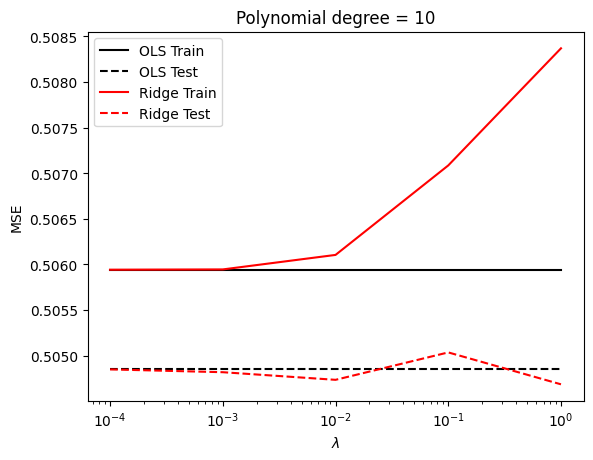

In [35]:
RegressionComparision(x, y, lmbda_vals=lmbda_vals, maxdegree=10)

### Polynomial of degree 15:

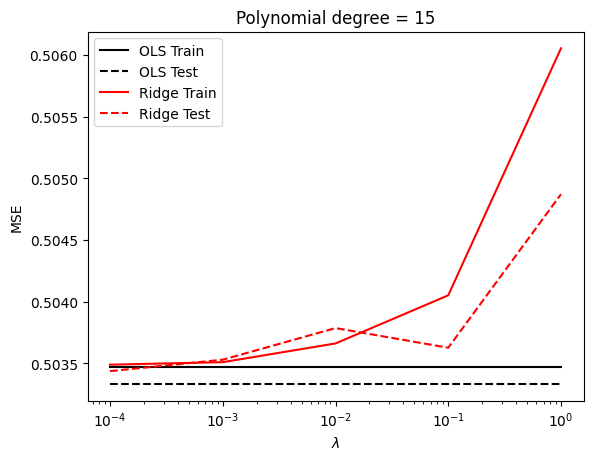

In [36]:
RegressionComparision(x, y, lmbda_vals=lmbda_vals, maxdegree=15)

With $\lambda$ plotted logarithmically, we can see that in general the error drops for the Ridge train MSE for every polynomial degree, but it drops more the higher degree we have, meaning we shrink the overfitting Ridge regression. The Ridge test MSE drops extremely more in the higher degree than the lower. For this random dataset it seems the Ridge regression in general is inferior to the ordinary least squares regression $\it{especially}$ with the higher$\lambda$-values.